Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes', u'genres_id',
       u'i_Sci-Fi', u'i_Crime', u'i_Romance', u'i_Animation', u'i_Music',
       u'i_Comedy', u'i_War', u'i_Horror', u'i_Film-Noir', u'i_Adventure',
       u'i_News', u'i_Reality-TV', u'i_Thriller', u'i_Western', u'i_Mystery',
       u'i_Short', u'i_Drama', u'i_Action', u'i_Documentary', u'i_Musical',
       u'i_History', u'i_Family', u'i_Fantasy', u'i_Game-Show', u'i_Sport',
       u'i_Biography'

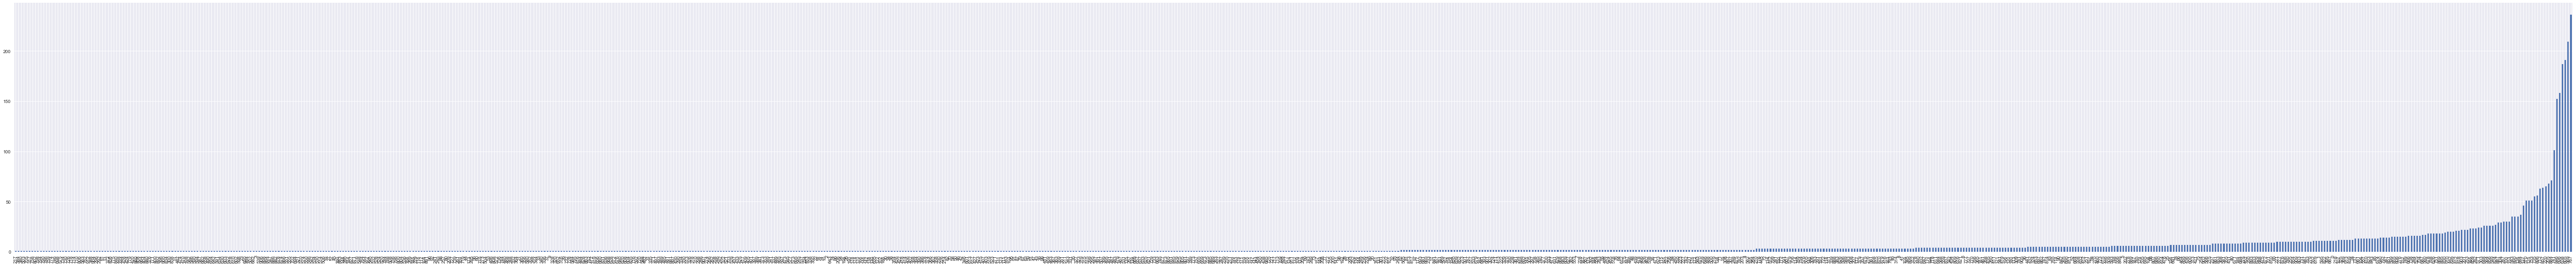

In [1]:
# import modules
import requests
import shutil
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

df = pd.read_csv("../milestone2/data/movie_metadata.csv")

df.head()

split_genres = [genres.split("|") for genres in df["genres"]]

# guarantee that each genre list is sorted alphabetically
split_genres = [sorted(genres) for genres in split_genres]

df["genres"] = split_genres

from sklearn.preprocessing import LabelEncoder

le_genres = LabelEncoder()

le_genres.fit(df["genres"])

df["genres_id"] = le_genres.transform(df["genres"])

len(df["genres_id"].unique())

label_set_counts = df["genres_id"].value_counts()

label_set_counts.sort_values(inplace=True)

label_set_counts.plot.bar(figsize=(100, 10))

top_10_most_popular_genres = list(label_set_counts.nlargest(10).index)

le_genres.inverse_transform(top_10_most_popular_genres)

# get list of genres
genres = list(set([genre for genre_list in split_genres for genre in genre_list]))

# one-hot-encoding by genre
for genre in genres:
    df['i_' + genre] = [int(genre in genre_list) for genre_list in df['genres']]

np.mean(df["i_Action"])

np.mean(df["i_Documentary"])

df.columns



In [2]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,i_Drama,i_Action,i_Documentary,i_Musical,i_History,i_Family,i_Fantasy,i_Game-Show,i_Sport,i_Biography
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,0,1,0,0,0,0,1,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,0,1,0,0,0,0,1,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,0,1,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,0,1,0,0,0,0,0,0,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],...,0,0,1,0,0,0,0,0,0,0


In [4]:
import pickle
df.to_pickle('imdb5000onehot.pkl')